# Monte Carlo simulation 

[*********************100%%**********************]  1 of 1 completed


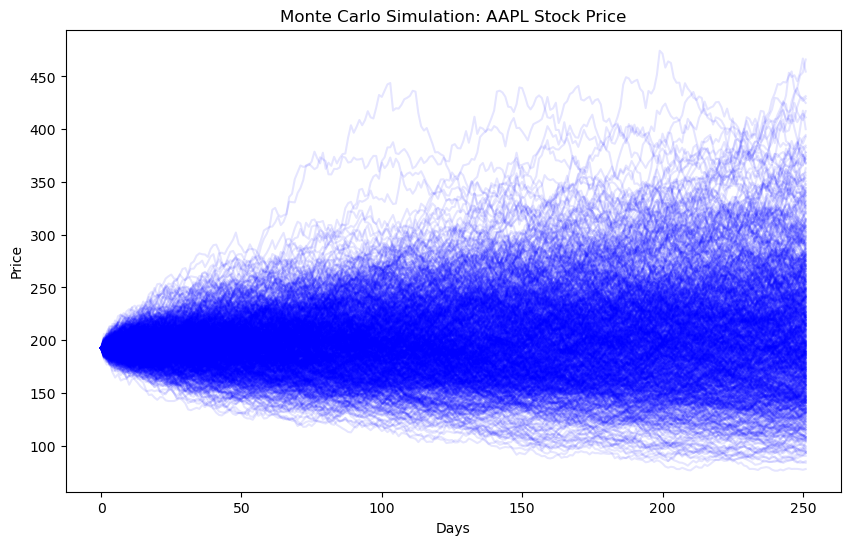

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical stock data
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2022-01-01', end='2024-01-01')
prices = data['Close']

# Parameters for Monte Carlo simulation
num_simulations = 1000
num_days = 252
returns = prices.pct_change().dropna()
mean_return = returns.mean()
volatility = returns.std()

# Simulation function
def monte_carlo_simulation(start_price, mean_return, volatility, num_simulations, num_days):
    simulation_results = np.zeros((num_simulations, num_days))
    
    for i in range(num_simulations):
        price_series = np.zeros(num_days)
        price_series[0] = start_price
        
        for t in range(1, num_days):
            price_series[t] = price_series[t-1] * np.exp(
                (mean_return - 0.5 * volatility**2) + volatility * np.random.normal()
            )
        
        simulation_results[i, :] = price_series
    
    return simulation_results

# Run simulations
start_price = prices[-1]
simulation_results = monte_carlo_simulation(start_price, mean_return, volatility, num_simulations, num_days)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(simulation_results.T, alpha=0.1, color='blue')
plt.title(f'Monte Carlo Simulation: {ticker} Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()
